<a href="https://colab.research.google.com/github/Cl8D/Python-Data-Analysis-Image-Processing/blob/main/30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **30강. 네이버 영화 리뷰 데이터 분석 2**

In [4]:
import urllib.request
from bs4 import BeautifulSoup

class Review:
  def __init__(self, comment, date, star, good, bad):
    # 리뷰 댓글
    self.comment = comment
    # 리뷰가 작성된 날짜
    self.date = date
    # 리뷰의 별점
    self.star = star
    # 사람들이 해당 리뷰에 대해 좋아요를 누른 수
    self.good = good
    # 사람들이 해당 리뷰에 대해 싫어요를 누른 수
    self.bad = bad

  def show(self):
    print("내용: " + self.comment +
          "\n날짜: " + self.date +
          "\n별점: " + self.star +
          "\n좋아요: " + self.good +
          "\n싫어요: " + self.bad)

In [5]:
def crawl(url):
  # 특정한 영화 정보의 url을 입력하면 파싱이 진행된다.
  soup = BeautifulSoup(urllib.request.urlopen(url).read(), "html.parser")
  # 리뷰 정보를 담는 리스트
  review_list = []
  
  # h_movie인 클래스의 h3 태그에 포함되어 있는 <a> 태그의 텍스트 값을 가져오기
  title = soup.find('h3', class_='h_movie').find('a').text
  # 실제 리뷰에 대한 정보를 가져오기. score_result 클래스의 <div> 태그
  div = soup.find("div", class_="score_result")
  # ul 태그에 있는 li 태그를 확인한다.
  data_list = div.select("ul > li")
  
  for review in data_list:
    # 별점
    star = review.find("div", class_="star_score").text.strip()
    # 리뷰 
    reply = review.find("div", class_="score_reple")
    comment = reply.find("p").text.strip()

    # dt 태그 중에 두 번째 요소에 실제 날짜가 담겨있는 걸 확인할 수 있다.
    date = reply.select("dt > em")[1].text.strip()
    # 버튼
    button = review.find("div", class_="btn_area")
    sympathy = button.select("a > strong")

    # 좋아요
    good = sympathy[0].text
    # 싫어요
    bad = sympathy[1].text
    review_list.append(Review(comment, date, star, good, bad))

  return title, review_list

In [6]:
import pandas as pd

def get_summary(review_list):
  # 별점 리스트
  star_list = []
  # 좋아요 리스트
  good_list = []
  # 싫어요 리스트
  bad_list = []
  
  for review in review_list:
    star_list.append(int(review.star))
    good_list.append(int(review.good))
    bad_list.append(int(review.bad))
    
  star_series = pd.Series(star_list)
  good_series = pd.Series(good_list)
  bad_series = pd.Series(bad_list)
  
  summary = pd.DataFrame({
      'Star': star_series,
      'Good': good_series,
      'Bad': bad_series,
      # 전체 중에서 좋아요의 비율을 나타내는 score 
      'Score': good_series / (good_series + bad_series)
  })
  
  return summary

In [7]:
# 5개의 영화 정보에 대한 크롤링을 시작한다.
movie_code_list = [136900, 167657, 174321, 184859, 167391]
review_lists = []

for i in movie_code_list:
  title, review_list = crawl("https://movie.naver.com/movie/bi/mi/basic.nhn?code=" + str(i))
  summary = get_summary(review_list)
  print("[ %s ]" % (title))
  print(summary)
  review_lists.append((title, review_list))

[ 어벤져스: 엔드게임 ]
   Star   Good  Bad     Score
0    10  23718  663  0.972807
1    10  15708  442  0.972632
2    10  15312  473  0.970035
3    10  13697  560  0.960721
4    10  11862  436  0.964547
[ 명탐정 피카츄 ]
   Star  Good  Bad     Score
0    10  1964  105  0.949251
1    10   987   85  0.920709
2    10   910   78  0.921053
3     8   957  283  0.771774
4     8   633   43  0.936391
[ 고양이 여행 리포트 ]
   Star  Good  Bad     Score
0    10    76    5  0.938272
1    10    45    3  0.937500
2    10    36    4  0.900000
3    10    32    2  0.941176
4     6    53   25  0.679487
[ 물의 기억 ]
   Star  Good  Bad     Score
0    10    28   11  0.717949
1    10    26   11  0.702703
2    10    23   10  0.696970
3    10    18    6  0.750000
4    10    21    9  0.700000
[ 더 캡틴 ]
   Star  Good  Bad     Score
0     9    88   12  0.880000
1    10    47    5  0.903846
2    10    48    7  0.872727
3     8    42    6  0.875000
4     8    30    0  1.000000


In [8]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 149406 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


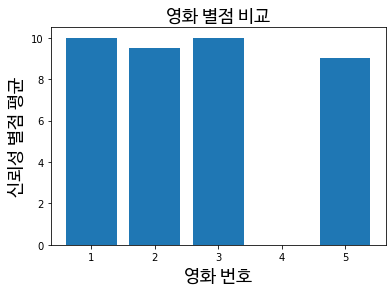

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# fontproperties 객체를 이용해서 matlablib에 폰트를 적용시킬 수 있다.
fontprop = fm.FontProperties(fname=font_path, size=18)

def movie_compare(review_lists):
  count = 1
  x = []
  y = []
  for movie, review_list in review_lists:
    x.append(count)
    summary = get_summary(review_list)
    # score가 0.8보다 큰 경우, 즉 신뢰할 수 있는 리뷰에 대해서만!
    summary = summary[summary['Score'] > 0.8]
    # 별점의 평균을 내준다.
    y.append(summary['Star'].mean())
    count += 1
  plt.bar(x, y)
  plt.title('영화 별점 비교', fontproperties=fontprop)
  plt.xlabel('영화 번호', fontproperties=fontprop)
  plt.ylabel('신뢰성 별점 평균', fontproperties=fontprop)
  plt.show()
  
movie_compare(review_lists)